In [188]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from datetime import datetime, timedelta

In [189]:
shelter_df = pd.read_csv("data/2013-2022-emergency-shelter-occupancy-machine-readable.csv", parse_dates=["Date"])
# manually add the missing value for the Brenda House 2022-04-01 capacity
shelter_df.loc[(shelter_df["Date"] == "2022-04-01") & (shelter_df["ShelterName"] == "Brendas House"), "Capacity"] = 60
shelter_df.set_index("Date", inplace=True)
shelter_df.head(3)

/var/folders/sy/lsfn4dnx0x75hhnpd76qp_c40000gn/T/ipykernel_29628/1383388227.py:1: DtypeWarning:

Columns (6,7) have mixed types. Specify dtype option on import or set low_memory=False.



,City,ShelterType,ShelterName,Organization,Shelter,Capacity,Overnight,Daytime,YEAR,MONTH
Date,,,,,,,,,,
2013-04-01,Edmonton,Women Emergency,WEAC,WEAC,,75,65,,2013,4
2013-04-01,Edmonton,Intox,Hope Mission - Intox Centre,Hope Mission,Intox Centre,70,74,,2013,4
2013-04-01,Edmonton,Adult Emergency,Hope Mission - Herb Jamieson Centre,Hope Mission,Herb Jamieson Centre,250,253,,2013,4


In [190]:
shelter_df = shelter_df.loc[shelter_df["City"] == "Calgary", ["ShelterType", "ShelterName", "Organization", "Shelter", "Capacity", "Overnight"]]
# shelter_df["Capacity"].astype("int64")

In [191]:
shelter_df = shelter_df.astype({"Capacity": "int32", "Overnight": "int32"})

In [192]:
shelter_df = shelter_df.loc[shelter_df["Capacity"] > 0]

In [193]:
shelter_df.head()

,ShelterType,ShelterName,Organization,Shelter,Capacity,Overnight
Date,,,,,,
2013-04-01,Adult Emergency,River Front,Calgary Drop-In Centre,River Front,725,700
2013-04-01,Winter Emergency,River Front - Winter Emergency,Calgary Drop-In Centre,River Front - Winter Emergency,140,90
2013-04-01,Short Term Supportive,River Front - Short Term Supportive,Calgary Drop-In Centre,River Front - Short Term Supportive,270,262
2013-04-01,Adult Emergency,Hillhurst Centre,Calgary Drop-In Centre,Hillhurst Centre,125,117
2013-04-01,Adult Emergency,Wagner Centre,Calgary Salvation Army,Wagner Centre (Women),23,12


In [194]:
shelter_df["Organization"].unique()

array(['Calgary Drop-In Centre', 'Calgary Salvation Army', 'Alpha House',
       'Mustard Seed Calgary', 'Calgary Dream Centre', 'Calgary YWCA',
       'Peter Coyle Place', 'Inn from the Cold', 'Brendas House',
       'The Alex'], dtype=object)

In [195]:
shelter_df.loc[shelter_df["Shelter"].str.contains("19")]

,ShelterType,ShelterName,Organization,Shelter,Capacity,Overnight
Date,,,,,,
2020-04-01,COVID19 Expanded Shelter,Alpha House - Clarion,Alpha House,COVID19 Expanded Shelter,40,40
2020-04-01,COVID19 Isolation Site,Alpha House - Main Site,Alpha House,COVID19 Isolation Site,2,1
2020-04-01,COVID19 Isolation Site,Alpha House - Lakeview Hotel,Alpha House,COVID19 Isolation Site,100,0
2020-04-01,COVID19 Social Distancing Measures,Riverfront - Combined,Calgary Drop-In Centre,COVID19 Social Distancing Measures,392,754
2020-04-01,COVID19 Expanded Shelter,Telus Convention Centre,Calgary Drop-In Centre,COVID19 Expanded Shelter,350,0
...,...,...,...,...,...,...
2022-06-26,COVID19 Social Distancing Measures,Riverfront - Combined,Calgary Drop-In Centre,COVID19 Social Distancing Measures,1028,456
2022-06-27,COVID19 Social Distancing Measures,Riverfront - Combined,Calgary Drop-In Centre,COVID19 Social Distancing Measures,1028,477
2022-06-28,COVID19 Social Distancing Measures,Riverfront - Combined,Calgary Drop-In Centre,COVID19 Social Distancing Measures,1028,460


In [196]:
org_type = {
    'Calgary Drop-In Centre': "public", 
    'Calgary Salvation Army': "religious", 
    'Alpha House': "private",
    'Mustard Seed Calgary': "religious", 
    'Calgary Dream Centre': "charitable", 
    'Calgary YWCA': "charitable",
    'Peter Coyle Place': "private", 
    'Inn from the Cold': "charitable", 
    'Brendas House': "charitable",
    'The Alex': "charitable",
}

In [197]:
shelter_df["organization_category"] = shelter_df["Organization"].map(lambda x: org_type[x])
shelter_df["occupation_rate"] = shelter_df["Overnight"] / shelter_df["Capacity"]
shelter_df = shelter_df.loc[:, ["organization_category", "occupation_rate", "Capacity"]]

In [198]:
shelter_df = shelter_df.reset_index()
shelter_df["year"] = shelter_df["Date"].dt.year
shelter_df["month"] = shelter_df["Date"].dt.month

charitable   private    public  religious
year month                                           
2013 4        0.807792  0.892429  0.837954   0.828436
     5        0.895268  0.915375  0.748039   0.812225
     6        0.702104  0.871861  0.826999   0.690183
     7        0.842897  0.913909  0.940880   0.797886
     8        0.881335  0.924696  0.931781   0.788934
...                ...       ...       ...        ...
2022 2        0.641573  0.942533  0.521443   0.770229
     3        0.690713  0.927807  0.291888   0.758096
     4        0.715357  0.909216  0.257259   0.825552
     5        0.747912  0.902657  0.300160   0.727309
     6        0.797879  0.869289  0.222941   0.721967

[111 rows x 4 columns]

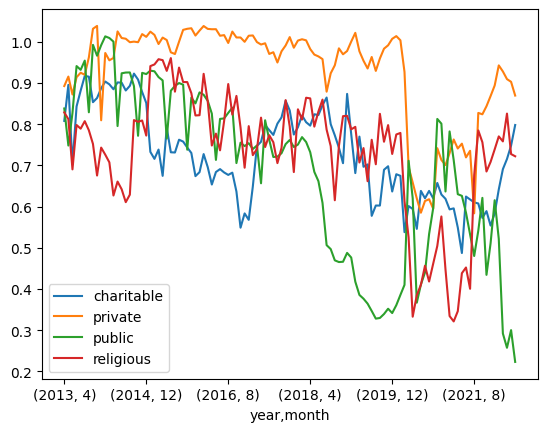

In [199]:
a = shelter_df.loc[:, ["year", "month", "organization_category", "occupation_rate"]] \
    .groupby(["year", "month", "organization_category"]) \
    .mean("occupation_rate") \
    .unstack()

a.columns = ["charitable", "private", "public", "religious"]
a.plot()
a

charitable  private      public   religious
year month                                             
2013 4       75.833333     86.0  315.000000  150.500000
     5       81.000000    112.0  315.000000  184.000000
     6       81.000000    112.0  373.333333  184.000000
     7       81.000000    112.0  373.333333  184.000000
     8       81.000000    112.0  373.333333  184.000000
...                ...      ...         ...         ...
2022 2       57.375000     94.0  240.666667  145.000000
     3       57.375000     94.0  427.597403  210.416667
     4       57.375000     94.0  517.500000  225.000000
     5       57.375000     94.0  517.500000  201.342857
     6       54.887892     94.0  517.500000  156.000000

[111 rows x 4 columns]

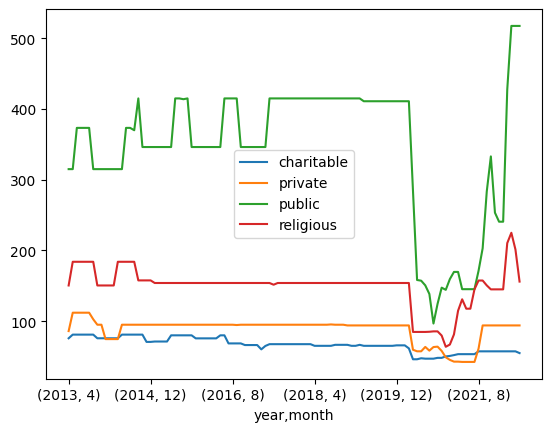

In [200]:
b = shelter_df.loc[:, ["year", "month", "organization_category", "Capacity"]] \
    .groupby(["year", "month", "organization_category"]) \
    .mean("Capacity") \
    .unstack()

b.columns = ["charitable", "private", "public", "religious"]
b.plot()
b

In [201]:
a.dtypes

charitable    float64
private       float64
public        float64
religious     float64
dtype: object

In [202]:
a = a.reset_index()
a["Y-M"] = pd.to_datetime(a["year"].astype("str") + "-" + a["month"].astype("str"))

In [234]:
new_lel = pd.melt(
    a, 
    id_vars=["year", "month"], 
    var_name="org_type", 
    value_vars=["charitable", "private", "public", "religious"], 
    value_name="occupancy_rate"
)
# new_lel.loc[(new_lel["year"] == 2013) & (new_lel["month"] == 4)]
new_lel = new_lel.astype({"year": "str", "month": "str"})
# new_lel["Y-M"] = a["year"] + "-" + a["month"]
new_lel["Y-M"] = pd.to_datetime(new_lel[['year', 'month']].agg('-'.join, axis=1))

In [237]:
new_lel.loc[new_lel["Y-M"] == "2019-01"]

,year,month,org_type,occupancy_rate,Y-M
69,2019,1,charitable,0.873363,2019-01-01
180,2019,1,private,0.977419,2019-01-01
291,2019,1,public,0.487515,2019-01-01
402,2019,1,religious,0.820126,2019-01-01


In [239]:
import plotly.express as px


fig = px.line(new_lel, x="Y-M", y="occupancy_rate", animation_frame="year", animation_group="org_type",
           color="org_type", hover_name="org_type",
           range_y=[0, 1.2])

fig["layout"].pop("updatemenus") # optional, drop animation buttons
fig.show()

,year,month,org_type,occupancy_rate,Y-M
69,2019,1,charitable,0.873363,2019-01-01
